
# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

The author has always enjoyed going to the cinema. The author, like most people, has seen both good and bad movies. But what factors go into deciding whether a film is good or bad? Several factors can influence the quality of a film, such as the budget, genre, and so on. This small project will aid the author in honing his data analytics skills and investigating some of the performance criteria for films.
### Questions to answer

1.Which year has the highest release of movies?

2.Which Movie Has The Highest Or Lowest Profit?

3.Movie with Longest And Shortest Rintime?

4.what top 10 movies which earn highest profit?

5.Are short movies more popular?

6.Which genres have the largest revenue and largest budgets?

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [292]:
# Read the CSV File Using Pandas read_csv function

df = pd.read_csv('tmdb-movies (2).csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [293]:
# print the concise summery of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [294]:
df.shape

(10866, 21)

In [295]:
#print concise summery of the dataset

df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [296]:
#count total rows in each column which contain null values

df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

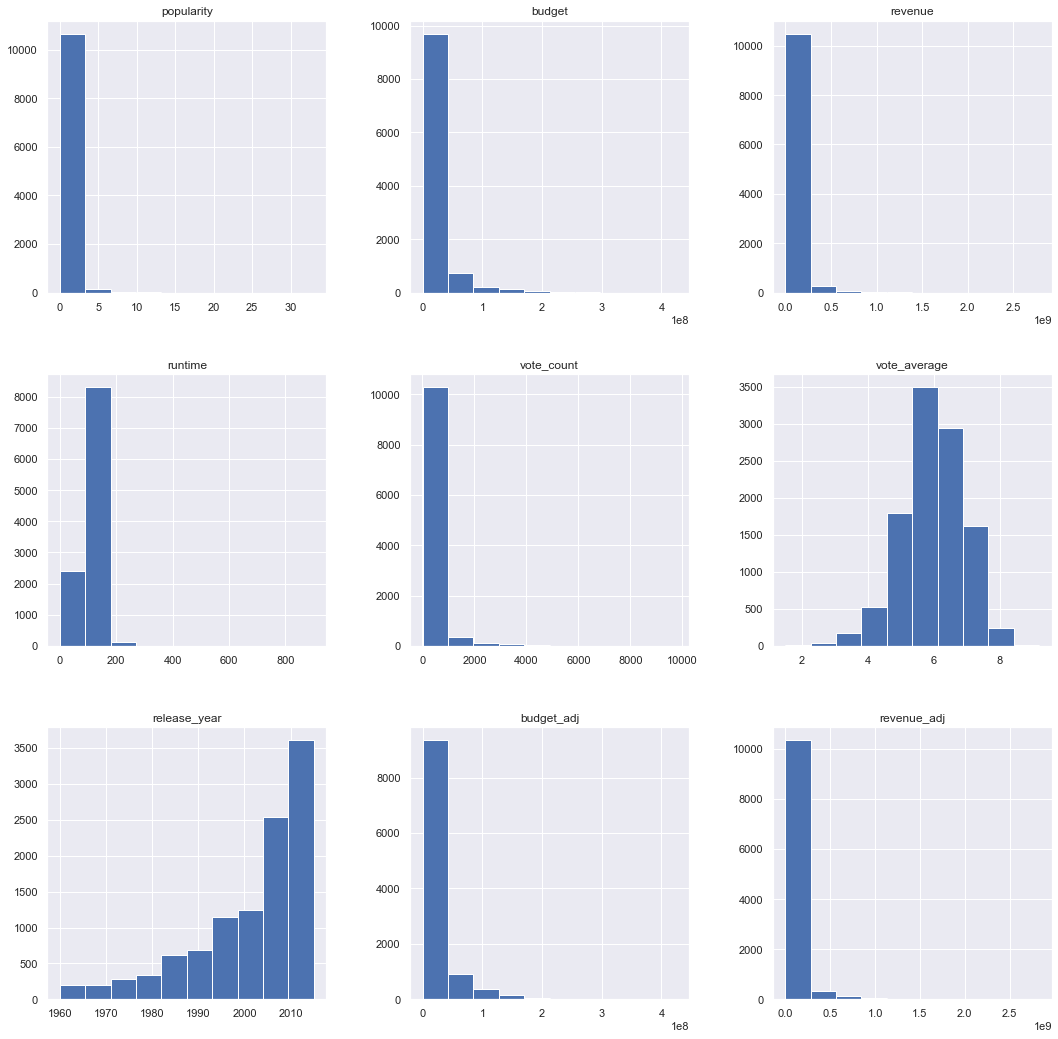

In [297]:
# Lets get a quick Histogram plot up and running.
# We want to ignore the id column since it's not a relevant for plotting


df.drop(['id'], axis=1).hist(figsize=( 18,18));

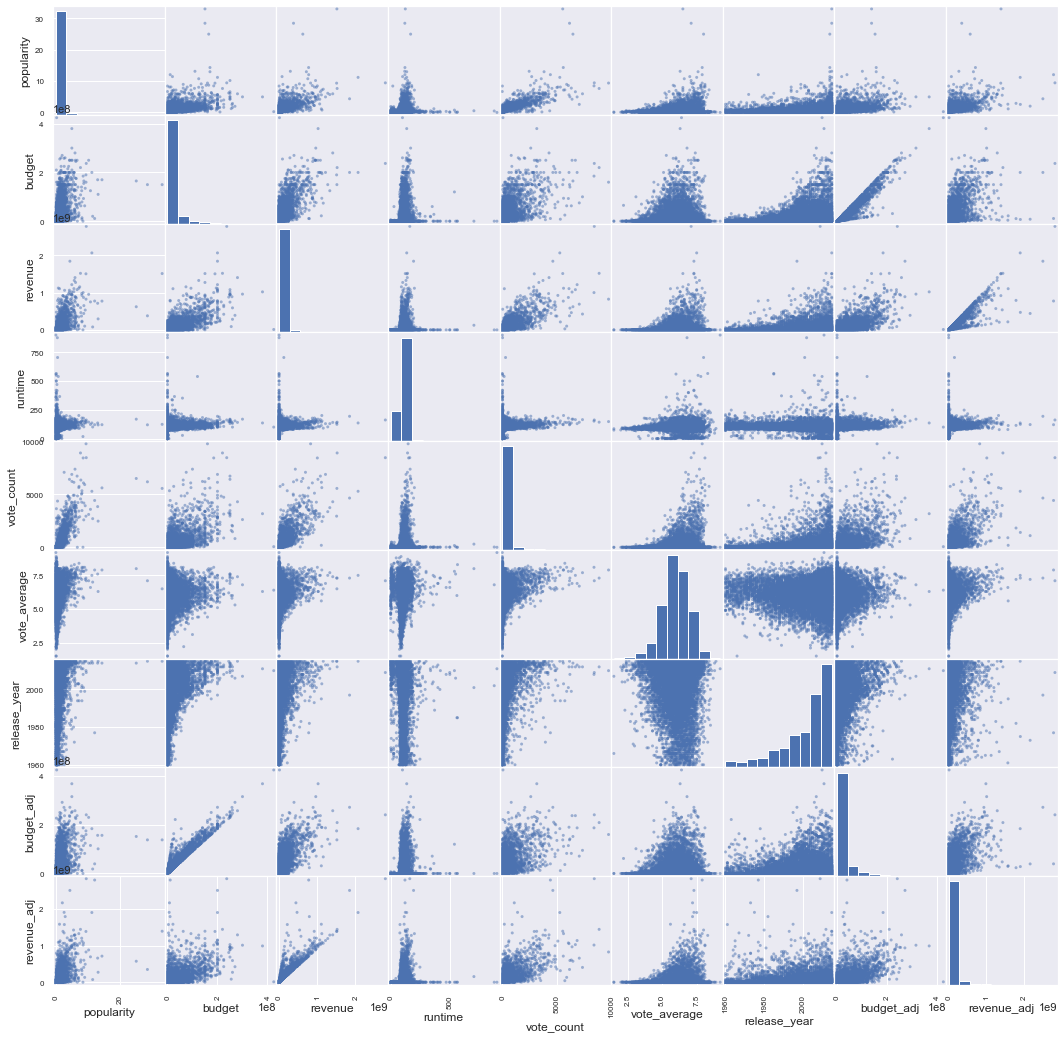

In [298]:
pd.plotting.scatter_matrix(df.drop(['id'], axis=1), figsize=(18,18));

In [299]:
#for counting the duplicate elements we sum all the rows

sum(df.duplicated())

1



### Data Cleaning (Removing The Unused Information From The Dataset)

#### Information That We Need To Delete Or Modify
We need to remove duplicate rows from the dataset,

Changing format of release date into datetime format,

Remove the unused colums that are not needes in the analysis process.,

Drop rows with zero values in budget and revenue


In [300]:
df.drop_duplicates(inplace = True)
df.shape


# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


(10865, 21)

In [301]:
#Changing format of release date into datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [302]:
#Remove the unused colums that are not needes in the analysis.,

unused_column = ['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline']
df.drop(unused_column, axis = 1 ,inplace = True)

In [303]:
df.shape

(10865, 15)

In [304]:
df[df['revenue'] == 0].shape[0]

6016

In [305]:
df[df['budget'] == 0].shape[0]

5696

In [306]:
#Drop rows with zero values in budget and revenue

df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

df.dropna(inplace =True)

In [307]:
df.dropna(inplace = True)

In [308]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 ( Which year has the highest release of movies?)

Text(0, 0.5, 'Number Of Movies')

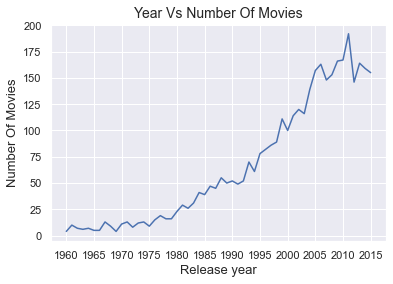

In [309]:
# make group for each year and count the number of movies in each year 
#make group of the data according to their release year and count the total number of movies in each year and pot.

df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)


Based on the plot and results, we can infer that the year 2014 had the most movie releases (700), followed by 2013 (659) and 2015 (629).

### Research Question 2  (Which Movie Has The Highest Or Lowest Profit?)

In [310]:
#print the movie with low profit
df['profit'] = df['revenue'] - df['budget']
min_index = df['profit'].min()
dfmin =df[df['profit']==min_index]
print("Movie Which Has Highest profit:"+ dfmin.original_title)


2244    Movie Which Has Highest profit:The Warrior's Way
Name: original_title, dtype: object


In [311]:
#print the movie with high profit
max_index = df['profit'].max()
dfmax =df[df['profit']==max_index]
dfmax.original_title
print("Movie Which Has Highest profit  : "+ dfmax.original_title)

1386    Movie Which Has Highest profit  : Avatar
Name: original_title, dtype: object


In [312]:

#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    h = pd.DataFrame(df.loc[high_index,:])
    lo = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([h,lo],axis = 1)

#call the find_minmax function.
find_minmax('profit')

Movie Which Has Highest profit :  Avatar
Movie Which Has Lowest profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


### Research Question 3 : Movie with Longest And Shortest Rintime?¶


In [313]:
#use 'find_minmax' function which i made earlier by passsing 'runtime' as argument.
#it can't be possible a movie with zero runtime,but dataset contain some data like this.
#so update zero with NAN in runtime column.
df['runtime'] = df['runtime'].replace(0,np.NAN)
find_minmax('runtime')

Movie Which Has Highest runtime :  Carlos
Movie Which Has Lowest runtime  :  Mickey's Christmas Carol


,2107,8005
id,43434,14813
popularity,0.534192,0.592219
budget,1.8e+07,3e+06
revenue,871279,2.1e+07
original_title,Carlos,Mickey's Christmas Carol
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director,Olivier Assayas,Burny Mattinson
keywords,gun|car bomb|tv mini-series|terrorism|opec,cartoon|scrooge|ghost|charles dickens|christmas
runtime,338,26
genres,Crime|Drama|Thriller|History,Family|Animation


### Research Question 4  (what top 10 movies which earn highest profit? )

In [314]:
#calculate Profit for each of the movie


sorted_revenue_biggest = df.sort_values(by=['profit'], ascending = False).head(10)
sorted_revenue_biggest.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.544506e+09
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.868178e+09
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,1.645034e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.316249e+09


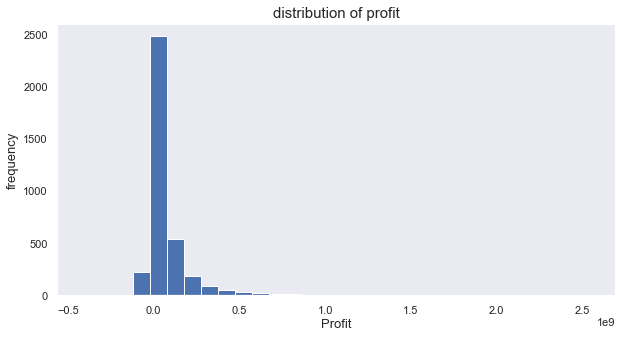

In [315]:
ax= df['profit'].hist(grid = False , bins=30)
ax.set_title("distribution of profit",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
ax.set_ylabel("frequency",fontsize = 13)
sns.set_style("darkgrid")

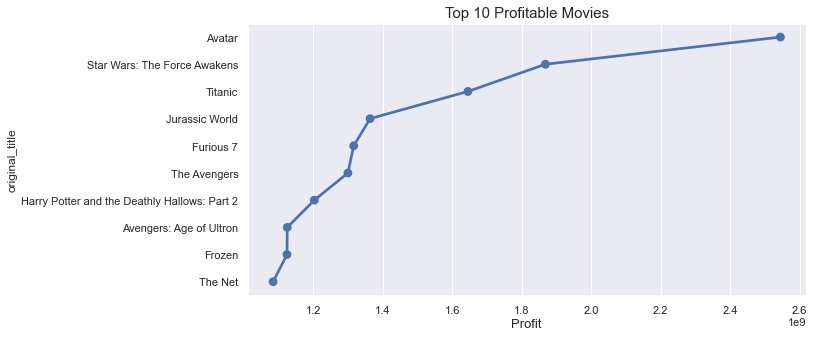

In [316]:
ax = sns.pointplot(x=sorted_revenue_biggest['profit'],y=sorted_revenue_biggest['original_title'])
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

Top 3 Profitable Movies is Avatar , star Wars , Titanic

### Research Question 5( Are short movies more popular? )

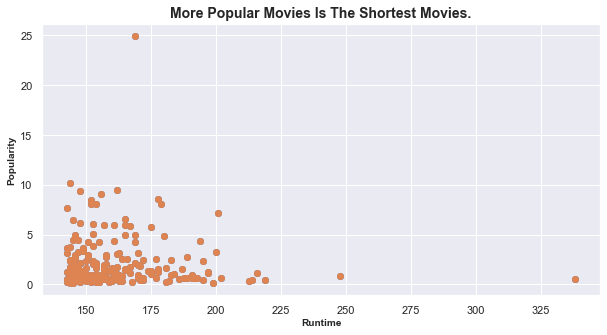

In [317]:
shorter = df.sort_values(by=['runtime'], ascending = False).head(200)
runtime = shorter['runtime']
popularity = shorter['popularity']
plt.scatter(runtime, popularity)



# Add title and format it
plt.title('more popular movies is the shortest movies.'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('runtime'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('popularity'.title(),
               fontsize = 10, weight = "bold")
# (If there is a legend, you can use this) Change legend title and format it, move legend
plt.scatter(runtime, popularity)
           

 more popular movies is the shortest movies.


###  Research Question 6(Which genres have the largest revenue and largest budgets? )

In [318]:
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

In [319]:
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.head(10)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08


In [320]:
genres_df.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [321]:
# group exploded dataframe by genres, get average popularity
genres_df.groupby('genres').popularity.mean()

genres
Action             1.608879
Adventure          1.907224
Animation          1.751683
Comedy             1.049774
Crime              1.140127
Documentary        0.353553
Drama              1.031941
Family             1.519272
Fantasy            1.779804
Foreign            0.194631
History            0.980373
Horror             0.867882
Music              0.939256
Mystery            1.150349
Romance            0.986131
Science Fiction    1.893469
TV Movie           0.273628
Thriller           1.282336
War                1.261136
Western            1.143814
Name: popularity, dtype: float64

Text(0, 0.5, 'Genersl')

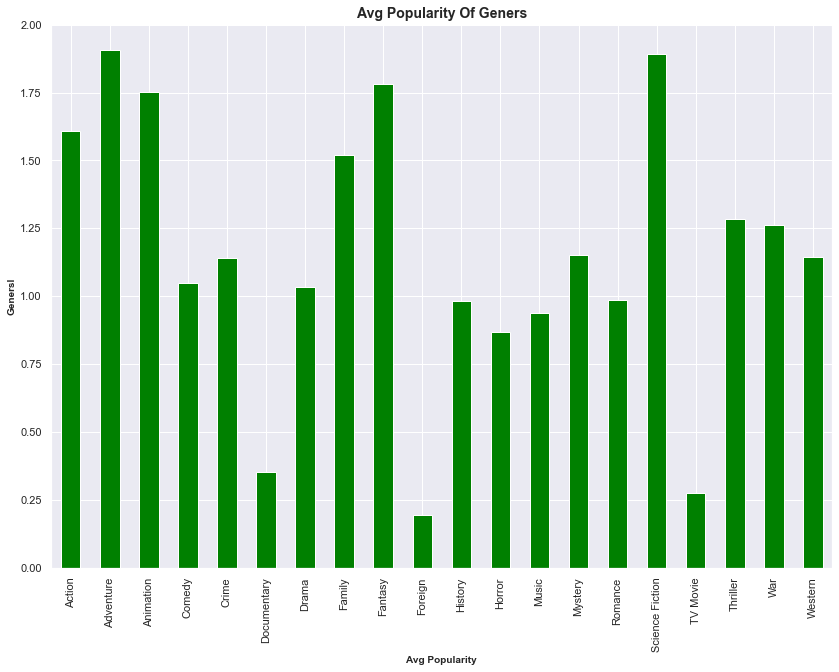

In [322]:
genres_df.groupby('genres').popularity.mean().plot.bar(color='green' , figsize = (14,10) )
plt.title('avg popularity of geners'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('avg popularity'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('genersl'.title(),
               fontsize = 10, weight = "bold")

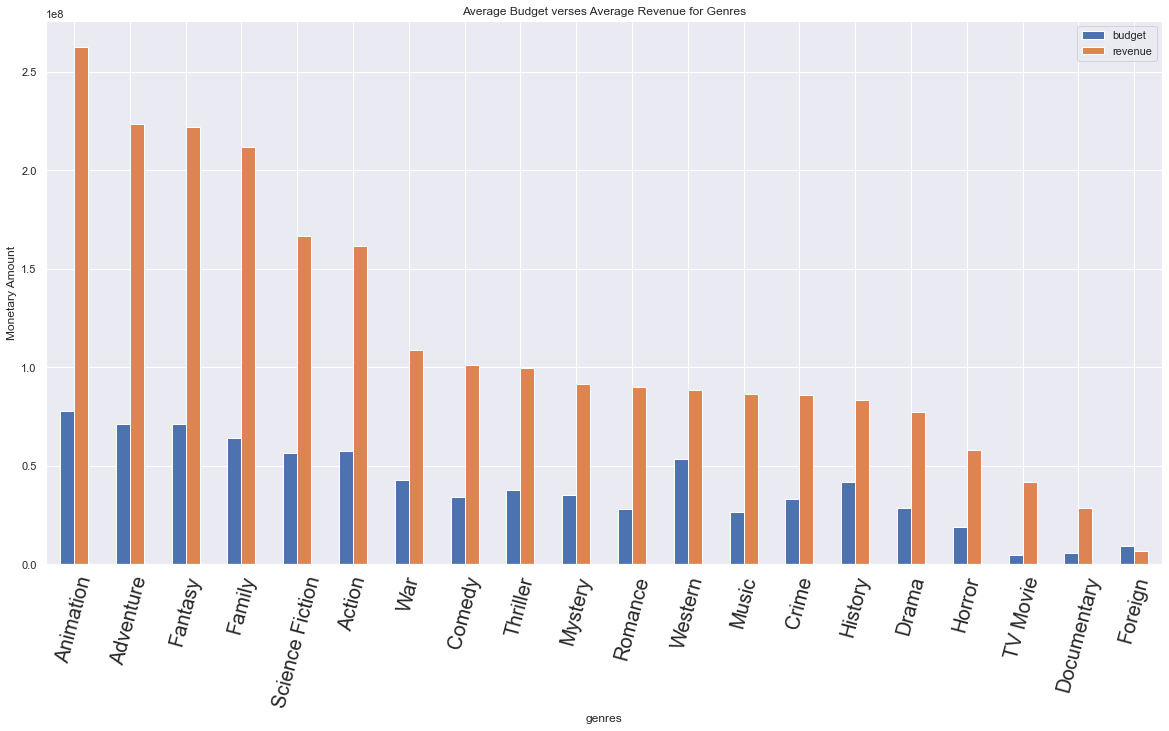

In [323]:
# average budget and revenue of each genres' movies

f,ax=plt.subplots(figsize=(20, 10))
genres_df[['genres', 'budget', 'revenue']].groupby(['genres']).mean().sort_values(["revenue","budget"], ascending=False).plot(kind="bar",  ax=ax);
plt.xticks(rotation=75,fontsize=20)

ax.set(ylabel = 'Monetary Amount', title = 'Average Budget verses Average Revenue for Genres')

plt.show()

This is fantastic! It appears that we have a list of genres sorted by average budget and sales! It seems that animation is a big earner, and then there's Adventure - but with a higher budget, doesn't that imply that it's less profitable in terms of Return on Investment? In terms of sales, it seems that foreign films, documentaries, and television movies are at the bottom.

<a id='conclusions'></a>
## Conclusions
'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.

Maximum Number Of Movies Release In year 2014.

"The Warrior's Way" Movie Has The Lowest Profit

"Avatar "Movie Has The Highest Profit

 more popular movies is the shortest movies.


### Limitations
It's not a 100% guarantee that this formula will work, but it does show us that if we have similar characteristics, we have a good chance of making a lot of money. If we release a film with these characteristics, people would have high hopes for it. This is only one example of an uncontrollable variable that can lead to a variety of outcomes; there are several others that must be considered.